<h1 style='color:blue;' align='center'>KFold Cross Validation Python Tutorial</h2>

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits = load_digits()

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.3)

**Logistic Regression**

In [3]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9592592592592593

**SVM**

In [4]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.524074074074074

**Random Forest**

In [5]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9833333333333333

<h2 style='color:purple'>KFold cross validation</h2>

**Basic example**

In [6]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [7]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [8]:
kf = KFold(n_splits=10)
kf

KFold(n_splits=10, random_state=None, shuffle=False)

In [10]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9,10]):
    print(train_index, test_index)

[1 2 3 4 5 6 7 8 9] [0]
[0 2 3 4 5 6 7 8 9] [1]
[0 1 3 4 5 6 7 8 9] [2]
[0 1 2 4 5 6 7 8 9] [3]
[0 1 2 3 5 6 7 8 9] [4]
[0 1 2 3 4 6 7 8 9] [5]
[0 1 2 3 4 5 7 8 9] [6]
[0 1 2 3 4 5 6 8 9] [7]
[0 1 2 3 4 5 6 7 9] [8]
[0 1 2 3 4 5 6 7 8] [9]


**Use KFold for our digits example**

In [11]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [12]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

scores_logistic = []
scores_svm = []
scores_rf = []

for train_index, test_index in folds.split(digits.data,digits.target):
    X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], \
                                       digits.target[train_index], digits.target[test_index]
    scores_logistic.append(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test))  
    scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))

In [13]:
scores_logistic

[0.8948247078464107, 0.9532554257095158, 0.9098497495826378]

In [14]:
scores_svm

[0.3806343906510851, 0.41068447412353926, 0.5125208681135225]

In [15]:
scores_rf

[0.9365609348914858, 0.9532554257095158, 0.9282136894824707]

<h2 style='color:purple'>cross_val_score function</h2>

In [16]:
from sklearn.model_selection import cross_val_score

**Logistic regression model performance using cross_val_score**

In [17]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), digits.data, digits.target,cv=10)

array([0.91111111, 0.93888889, 0.89444444, 0.86666667, 0.94444444,
       0.97222222, 0.97777778, 0.94972067, 0.8603352 , 0.94413408])

**svm model performance using cross_val_score**

In [18]:
cross_val_score(SVC(gamma='auto'), digits.data, digits.target,cv=10)

array([0.43888889, 0.57777778, 0.46666667, 0.38888889, 0.47222222,
       0.4       , 0.50555556, 0.57541899, 0.55865922, 0.43575419])

**random forest performance using cross_val_score**

In [19]:
cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target,cv=10)

array([0.88888889, 0.96111111, 0.93333333, 0.92222222, 0.95555556,
       0.97777778, 0.96666667, 0.98324022, 0.91061453, 0.95530726])

cross_val_score uses stratifield kfold by default

<h2 style='color:purple'>Parameter tunning using k fold cross validation</h2>

In [34]:
scores1 = cross_val_score(RandomForestClassifier(n_estimators=5),digits.data, digits.target, cv=10)
np.average(scores1)

0.8793698637138034

In [35]:
scores2 = cross_val_score(RandomForestClassifier(n_estimators=20),digits.data, digits.target, cv=10)
np.average(scores2)

0.9358915527370766

In [36]:
scores3 = cross_val_score(RandomForestClassifier(n_estimators=30),digits.data, digits.target, cv=10)
np.average(scores3)

0.9494121957589801

In [37]:
scores4 = cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target, cv=10)
np.average(scores4)

0.9482877777434258

Here we used cross_val_score to
fine tune our random forest classifier and figured that having around 40 trees in random forest gives best result. 

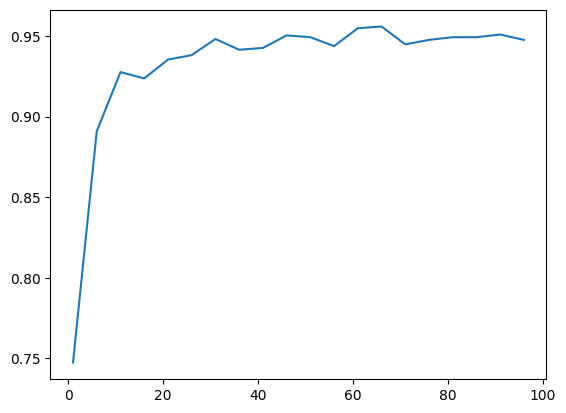

In [23]:
estimators = np.arange(1,100,5)
scores = []

for i in estimators:
    scores.append(np.average(cross_val_score(RandomForestClassifier(n_estimators=i),digits.data, digits.target, cv=10)))

plt.plot(estimators, scores)

In [41]:
import pandas as pd
params = dict(zip(estimators,scores))
df = pd.DataFrame(params.values(),index=params.keys(),columns=['Scores'])
df.sort_values(by='Scores',ascending=False).head(5)

,Scores
66,0.956012
61,0.954910
91,0.951012
46,0.950466
86,0.949354


In [45]:
best = df.sort_values(by='Scores',ascending=False).head(1)
n_estimators = best.index[0]
print('the best n_estimators is:',n_estimators)


the best n_estimators is: 66
